Yao et al., 2013

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datetime import datetime
from cdasws import CdasWs
cdas = CdasWs()

TIME_RANGE = [datetime(1995, 2, 4, 13, 50), datetime(1995, 2, 4, 14, 10)]

_, proton_data = cdas.get_data(dataset='WI_PM_3DP', variables=['P_DENS', 'P_VELS', 'P_TEMP'], time0=TIME_RANGE[0], time1=TIME_RANGE[1])
_, mag_data = cdas.get_data(dataset='WI_H0_MFI', variables=['B3GSE'], time0=TIME_RANGE[0], time1=TIME_RANGE[1])

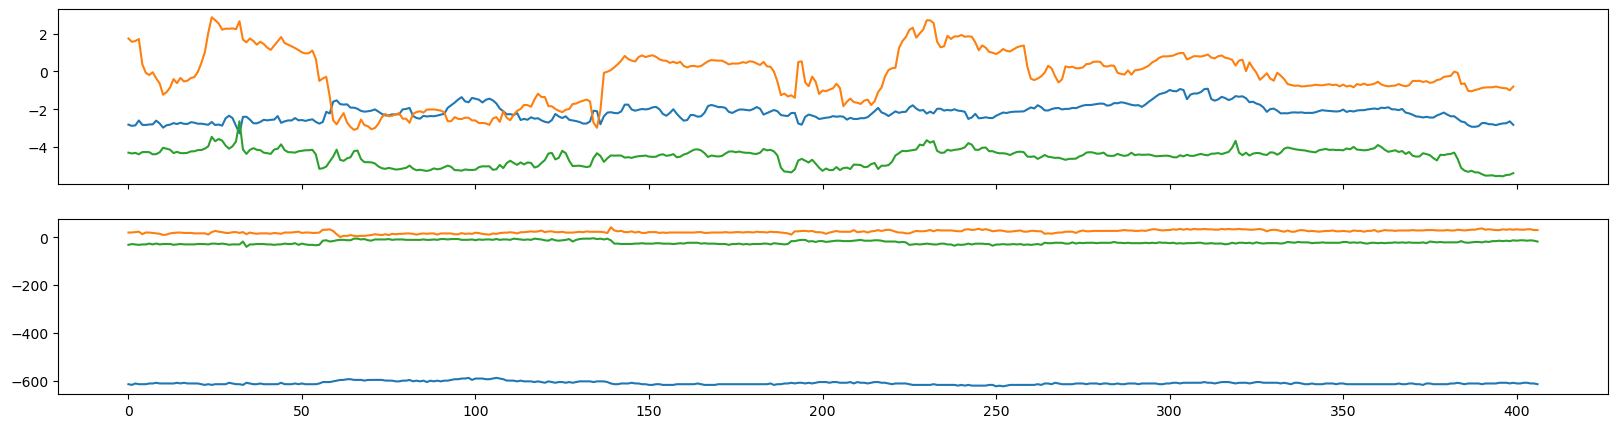

In [3]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(2, 1, figsize = (20, 5), sharex=True)
ax[0].plot(mag_data['B3GSE'])
ax[1].plot(proton_data['P_VELS'])

In [4]:
from astropy import units as u

u.set_enabled_aliases({'sec': u.s, '#': u.dimensionless_unscaled})

from datetime import timedelta
import spcphys_common_functions as scf

alfven_params = scf.alfvenic_parameters.calc_alfven_t(p_date=scf.preprocess.npdt64_to_dt(proton_data['Epoch'].values), 
                                                    v=proton_data['P_VELS'].values * u.Unit(proton_data['P_VELS'].units), 
                                                    n=proton_data['P_DENS'].values * u.cm**-3, 
                                                    b_date=scf.preprocess.npdt64_to_dt(mag_data['Epoch3'].values), 
                                                    b=mag_data['B3GSE'].values * u.nT, 
                                                    window_size=timedelta(seconds=90), 
                                                    step=timedelta(seconds=3), 
                                                    start_time=TIME_RANGE[0])


Text(0, 0.5, 'alfven speed')

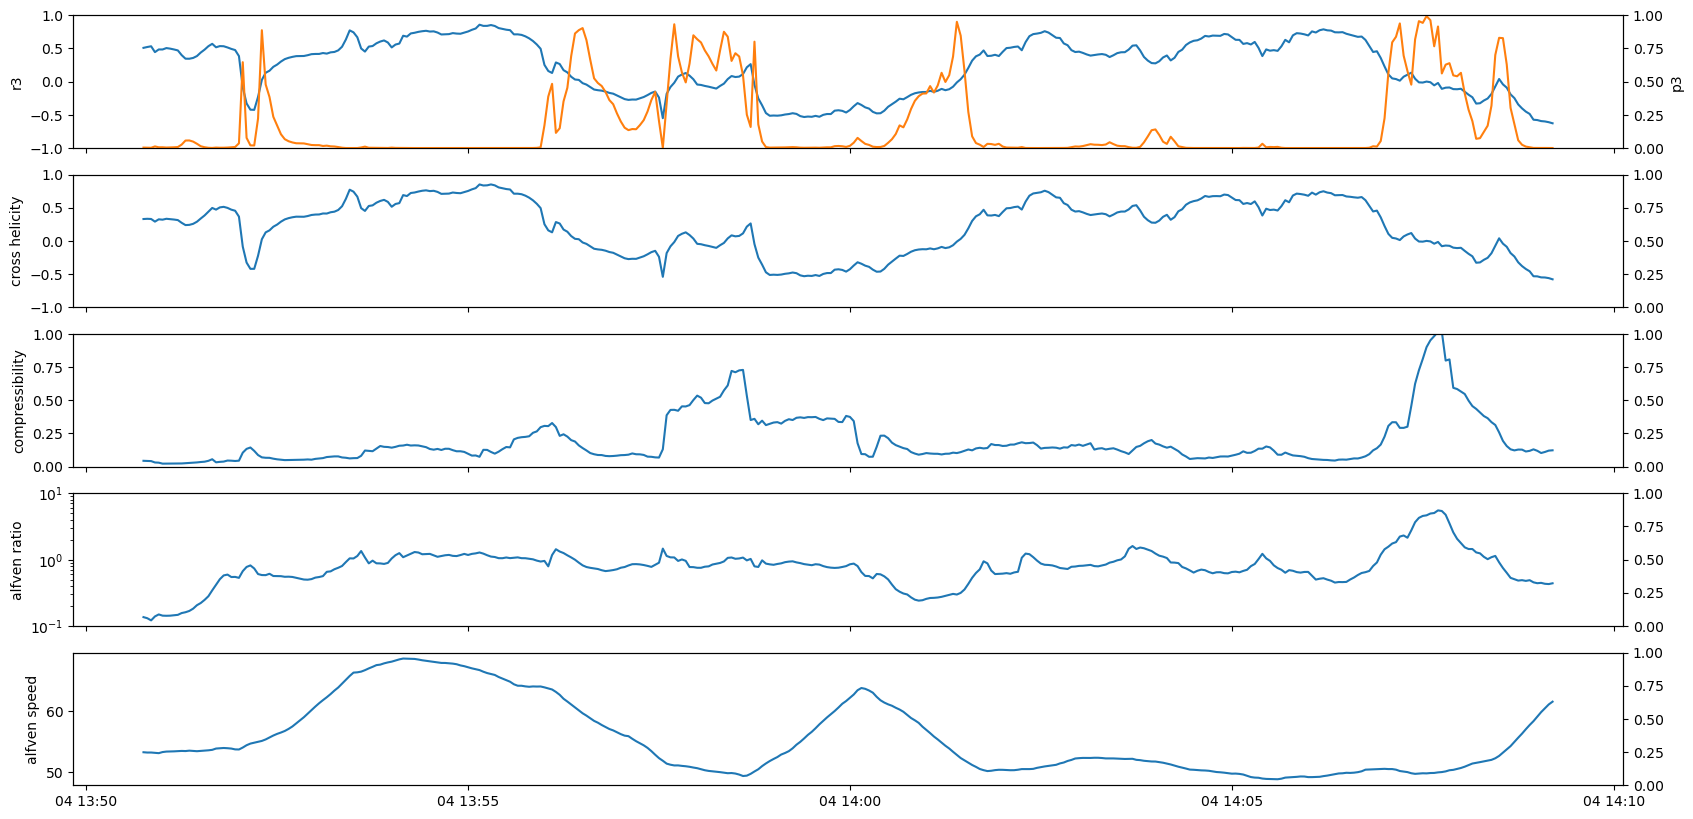

In [5]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(5, 1, figsize = (20, 10), sharex=True)
twinx = [ax_i.twinx() for ax_i in ax]

ax[0].plot(alfven_params['time'], alfven_params['r3'])
ax[0].set_ylabel('r3')
ax[0].set_ylim(-1, 1)
twinx[0].plot(alfven_params['time'], alfven_params['p3'], c='C1')
twinx[0].set_ylabel('p3')
twinx[0].set_ylim(0, 1)
ax[1].plot(alfven_params['time'], alfven_params['cross_helicity'])
ax[1].set_ylabel('cross helicity')
ax[1].set_ylim(-1, 1)
ax[2].plot(alfven_params['time'], alfven_params['compressibility'])
ax[2].set_ylabel('compressibility')
ax[2].set_ylim(0, 1)
ax[3].semilogy(alfven_params['time'], alfven_params['alfven_ratio'])
ax[3].set_ylabel('alfven ratio')
ax[3].set_ylim(0.1, 10)
ax[4].plot(alfven_params['time'], alfven_params['vA'].to(u.km/u.s))
ax[4].set_ylabel('alfven speed')

In [4]:
alfven_param = scf.alfvenic_parameters.calc_alfven(p_date=scf.preprocess.npdt64_to_dt(proton_data['Epoch'].values), 
                                                    v=proton_data['P_VELS'].values * u.Unit(proton_data['P_VELS'].units), 
                                                    n=proton_data['P_DENS'].values * u.cm**-3, 
                                                    b_date=scf.preprocess.npdt64_to_dt(mag_data['Epoch3'].values), 
                                                    b=mag_data['B3GSE'].values * u.nT, )
alfven_param

{'time': datetime.timedelta(seconds=1197, microseconds=210000),
 'r3': <Quantity 0.09493716>,
 'p3': <Quantity 0.05565608>,
 'residual_energy': <Quantity -0.26211381>,
 'cross_helicity': <Quantity 0.09161788>,
 'alfven_ratio': <Quantity 0.58464319>,
 'compressibility': <Quantity 0.08279211>,
 'vA': <Quantity 55624.9296875 m / s>,
 'time_window': [datetime.datetime(1995, 2, 4, 13, 50, 0, 965000),
  datetime.datetime(1995, 2, 4, 13, 50, 3, 914000)],
 'num_valid_p_points': 407,
 'num_valid_b_points': 400}

微妙的区别可能在于插值的方法？此处插值为先计算dva后从插值到质子时间点

In [5]:
import spcphys_common_functions as scf
from astropy import units as u

beta = scf.plasma_beta.calc_beta(p_date=scf.preprocess.npdt64_to_dt(proton_data['Epoch'].values),
                                    n=proton_data['P_DENS'].values * u.cm**-3,
                                    b_date=scf.preprocess.npdt64_to_dt(mag_data['Epoch3'].values),
                                    b=mag_data['B3GSE'].values * u.nT,
                                    T=scf.vth_E_T.E_to_T(proton_data['P_TEMP'].values * u.eV))

Text(0, 0.5, 'beta')

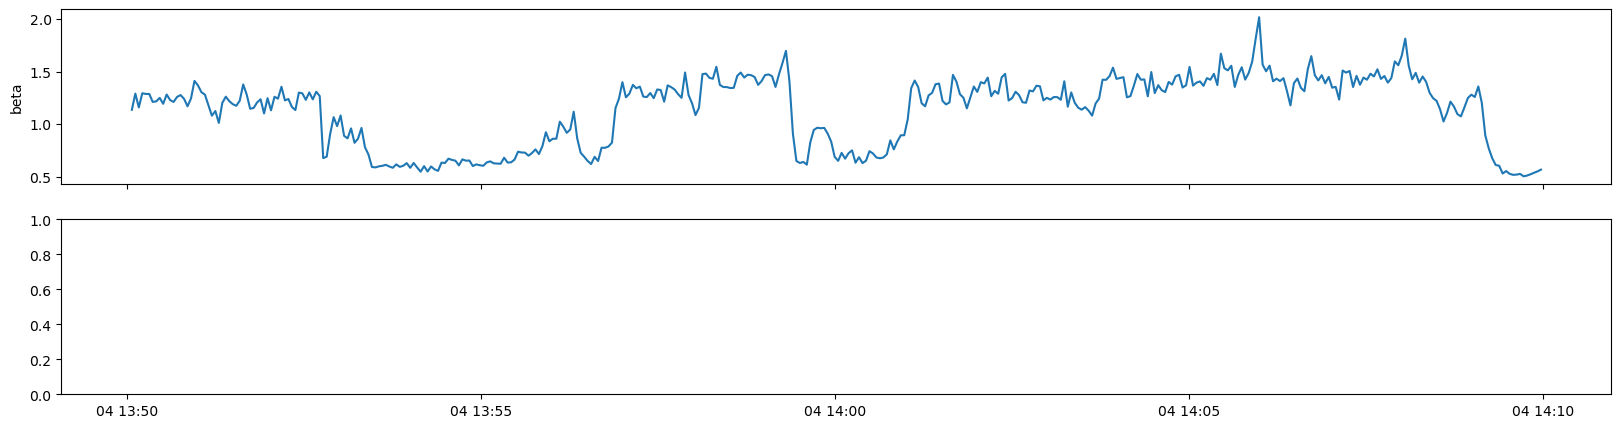

In [6]:
fig, ax = plt.subplots(2, 1, figsize = (20, 5), sharex=True)

ax[0].plot(scf.preprocess.npdt64_to_dt(proton_data['Epoch'].values), beta)
ax[0].set_ylabel('beta')
